In [4]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import scipy.io as sio
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import random
from collections import Counter
np.random.seed(0)
random.seed(0)
ran=0
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
from sklearn.metrics import accuracy_score
import xgboost as xgb
import os
import seaborn as sn
import pandas as pd
from sklearn.utils import class_weight
from sklearn import preprocessing

import mat73

In [5]:

path = r'D:/legRMG/data/ML_comp_feat/feat_v1_all/'


Data_ver='feat_v7_all.mat'
path1=os.path.join(path, Data_ver)
data = sio.loadmat(path1)
feat_all_final=data['feat_all_final'] # 3 optimal channels, choose 0 channel first  
feat_all_final_l=np.transpose(feat_all_final)
label_all=data['label_all'].ravel()
# % featMean(8) BR PP IN EX mean of (window mean) + BR PP IN EX mean of (window var)
# % fit pp: slope *100 (9); p2 (10); delta (11); fit br: slope *100 (12); p2 (13); delta (14);
# % err_br : error *100% (15)
featureName=['mean freq','mean PP','mean IN','mean EX','std freq','std PP','std IN','std EX',\
    'fit_slope pp','fit_bias pp','fit d pp','fit_slope freq','fit_bias freq','fitd freq','err freq',\
        'mean(br)','std(br)','mean(ibi)','std(ibi)','mean(pp)','std(pp)','mean(in)','std(in)','mean(ex)','std(ex)',\
    'mean(IEpp)','std(IEpp)','mean(IER)','std(IER)',\
        'covBR','covPP','covIN','covEX','covIBI',\
        'Cor_br', 'SD_br','Cor_ibi','SD_ibi','Cor_pp','SD_pp','Cor_in','SD_in','Cor_ex','SD_ex','Cor_IEpp','SD_IEpp','Cor_IER','SD_IER',\
        'skew_mean', 'kurt_mean','entro','cycle','fit_slope/mean PP','fit_slope Tlag','fit_bias Tlag','fitd Tlag','mean Tlag']



In [25]:
from sklearn.linear_model import LogisticRegression
x=feat_all_final_l
y=label_all
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1)
opt='tree'

acc_all=[]
impt=[]
y_p_all=[]
y_true_all=[]
test_ind_all=[]
acc_train_all=[]
for train_ind, test_ind in rkf.split(x,y):
    #print("%s %s" % (train_ind, test_ind))
    #print(test_ind)
    X_train=x[train_ind] 
    X_test=x[test_ind]
    y_train=y[train_ind] 
    y_test=y[test_ind]
    
    a=10
    
    #w={0:1,1:5}  
    # tree1 = DecisionTreeClassifier(max_depth=a).fit(X_train,y_train)
    
    tree1 = RandomForestClassifier(max_depth=a,criterion='entropy',n_estimators=20,max_features=None,min_samples_split=7,min_samples_leaf=5).fit(X_train,y_train)
    #clf = xgb.XGBClassifier(n_estimators=20).fit(X_train, y_train)
    clf1= svm.SVC(kernel="linear", C=0.2).fit(X_train, y_train)
    #clf = GaussianNB(var_smoothing=0.8)
    clf2=LogisticRegression(solver='newton-cg',C=0.2,class_weight='balanced').fit(X_train, y_train)
    model=clf1
    model=tree1
    y_p=model.predict(X_test)
    #print(y_test)
    acc=accuracy_score(y_test, y_p)
    acc_train=accuracy_score(y_train, model.predict(X_train))

    for i in range(len(y_p)):
        y_p_all.append(y_p[i])    
        y_true_all.append(y_test[i])
        test_ind_all.append(test_ind[i])
        

    
    
    acc_all.append(acc) 
    acc_train_all.append(acc_train) 
    impt.append(tree1.feature_importances_)

y_p_all=np.array(y_p_all)
y_true_all=np.array(y_true_all)
test_ind_all=np.array(test_ind_all)
acc_mean=accuracy_score(y_p_all, y_true_all)
acc_mean_train=np.mean(np.array(acc_train_all))
cm=confusion_matrix(y_true_all, y_p_all)
print(acc_mean)
print(acc_mean_train)
print(cm)
impt=np.array(impt) 
importance2=np.mean(impt,axis=0)
seq=np.argsort(importance2)
featureName=np.array(featureName)
featureName2=featureName[seq]
importance2=importance2[seq]
importance2=np.flip(importance2)
featureName2=np.flip(featureName2)
print(featureName2)
print(importance2)

0.8870967741935484
0.957012987012987
[[19  5]
 [ 2 36]]
['fit_slope Tlag' 'fit_slope/mean PP' 'fit_slope freq' 'fit_slope pp'
 'Cor_pp' 'fitd freq' 'fit_bias pp' 'fit d pp' 'fit_bias freq' 'mean PP'
 'entro' 'mean freq' 'fit_bias Tlag' 'err freq' 'mean(br)' 'kurt_mean'
 'Cor_ex' 'std PP' 'SD_in' 'SD_ex' 'std IN' 'mean(IER)' 'std(pp)'
 'mean Tlag' 'mean(pp)' 'Cor_IEpp' 'fitd Tlag' 'covEX' 'std(in)' 'std(ex)'
 'SD_br' 'cycle' 'std(IEpp)' 'mean(ex)' 'Cor_IER' 'SD_IEpp' 'mean(ibi)'
 'std(ibi)' 'mean EX' 'Cor_br' 'mean IN' 'covPP' 'std(IER)' 'std EX'
 'skew_mean' 'std(br)' 'covBR' 'Cor_ibi' 'SD_pp' 'SD_ibi' 'SD_IER'
 'std freq' 'mean(IEpp)' 'Cor_in' 'covIN' 'mean(in)' 'covIBI']
[4.72181578e-01 1.40823973e-01 1.37077466e-01 6.79908125e-02
 1.67583295e-02 1.57030853e-02 1.45332867e-02 1.06737920e-02
 8.40521856e-03 7.89496861e-03 6.33603499e-03 6.21030917e-03
 5.82374066e-03 5.75309256e-03 5.56684148e-03 5.35382485e-03
 5.24812501e-03 5.10863034e-03 3.77395501e-03 3.59824365e-03
 3.28404000e-

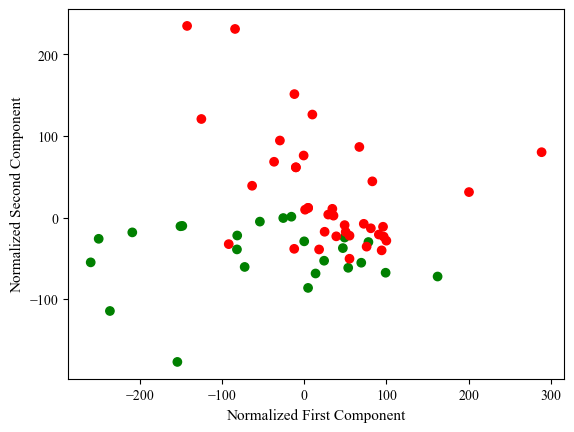

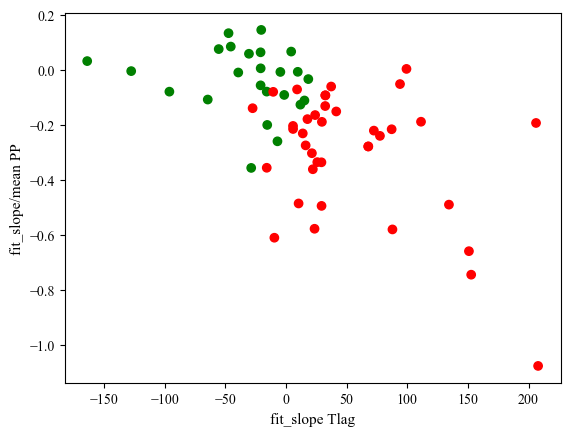

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
pca = PCA(n_components=2)
# colors=[]
# for label in label_all:
#     if label == 0 :
#         colors.append("g")
#     elif label == 1:
#         colors.append("r")
   
#     else:
#         colors.append("b")
# plt.rcParams["font.family"] = "Times New Roman"
X_pca = pca.fit_transform(x)
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.xlabel('Normalized First Component',fontsize=11)
plt.ylabel('Normalized Second Component',fontsize=11)


tle='PCA'
plt.savefig(path+r"/figPython/"+tle+Data_ver+".png", dpi=300)
plt.show()
plt.figure()
b=-2
plt.scatter(x[:, seq[-1]], x[:, seq[b]], c=colors)
plt.xlabel(featureName[seq[-1]],fontsize=11)
plt.ylabel(featureName[seq[b]],fontsize=11)



Folder=path
tle='feat2_scatter'
plt.savefig(Folder+r"/figPython/"+tle+Data_ver+".png", dpi=300)
plt.show()

In [14]:
test_ind_all[np.where(y_p_all!=y_true_all)]


array([49, 16, 31, 41, 61, 14, 55, 35,  3])

In [13]:
def cm_parameter(cm):
    if len(cm)==2:
        sen=cm[1,1]/(cm[1,1]+cm[1,0])
        pre=cm[1,1]/(cm[1,1]+cm[0,1])
        
    print('sen=' + str(round(sen, 3)) + ' pre=' + str(round(pre, 3)))    
    return sen,pre

sen=0.947 pre=0.878


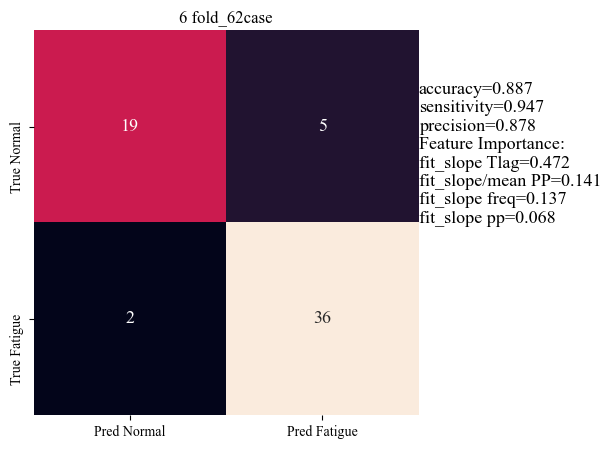

In [28]:
sen,pre=cm_parameter(cm)
acc=acc_mean
feat=featureName2
impt=importance2



name1=["True Normal", "True Fatigue"]
name2=["Pred Normal", "Pred Fatigue"]

w=7.5 #fig size 1      change when label num change
h=5  #fig size 2
a=2   #txt position 1   change when label num change
b=1   #txt position 2
size=13

df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()

sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
s01='accuracy={n:.3f}\nsensitivity={n11:.3f}\nprecision={n12:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
    format(n=acc,n11=sen,n12=pre,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
plt.text(a,b,s01,fontsize=size)
tle='6 fold_62case'
plt.title(tle)

figure = plt.gcf()
figure.set_size_inches(w, h)

Folder=path
plt.savefig(Folder+r"/figPython/"+tle+Data_ver+".png", dpi=300)
plt.show()

sen=0.895 pre=0.872


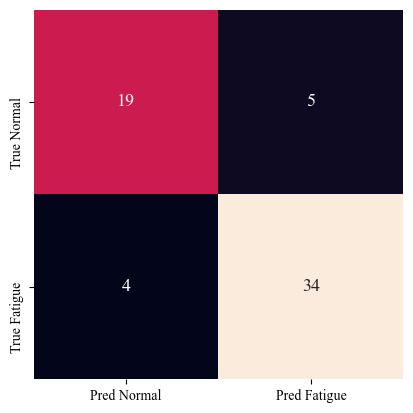

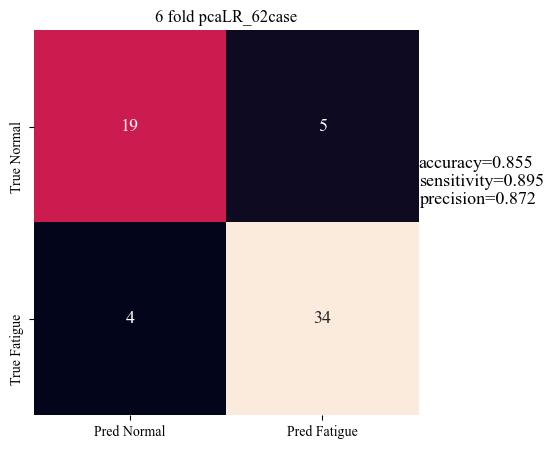

In [19]:
sen,pre=cm_parameter(cm)
acc=acc_mean
feat=featureName2
impt=importance2



name1=["True Normal", "True Fatigue"]
name2=["Pred Normal", "Pred Fatigue"]

w=7.5 #fig size 1      change when label num change
h=5  #fig size 2
a=2   #txt position 1   change when label num change
b=1   #txt position 2
size=13

df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()

sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
s01='accuracy={n:.3f}\nsensitivity={n11:.3f}\nprecision={n12:.3f}\n'.\
    format(n=acc,n11=sen,n12=pre)
plt.text(a,b,s01,fontsize=size)
tle='6 fold pcaLR_62case'
plt.title(tle)

figure = plt.gcf()
figure.set_size_inches(w, h)

Folder=path
plt.savefig(Folder+r"/figPython/"+tle+Data_ver+".png", dpi=300)
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
x=X_pca
y=label_all
rkf = RepeatedStratifiedKFold(n_splits=7, n_repeats=1)
opt='tree'

acc_all=[]
impt=[]
y_p_all=[]
y_true_all=[]
test_ind_all=[]
acc_train_all=[]
for train_ind, test_ind in rkf.split(x,y):
    #print("%s %s" % (train_ind, test_ind))
    #print(test_ind)
    X_train=x[train_ind] 
    X_test=x[test_ind]
    y_train=y[train_ind] 
    y_test=y[test_ind]
    
    a=10
    
    #w={0:1,1:5}  
    # tree1 = DecisionTreeClassifier(max_depth=a).fit(X_train,y_train)
    
    tree1 = RandomForestClassifier(max_depth=a,criterion='entropy',n_estimators=20,max_features=None,min_samples_split=7,min_samples_leaf=5).fit(X_train,y_train)
    #clf = xgb.XGBClassifier(n_estimators=20).fit(X_train, y_train)
    #clf= svm.SVC(kernel="rbf", C=0.3).fit(X_train, y_train)
    #clf = GaussianNB(var_smoothing=0.8)
    clf=LogisticRegression(solver='newton-cg',C=0.2,class_weight='balanced').fit(X_train, y_train)
    #model=clf
    model=clf
    y_p=model.predict(X_test)
    #print(y_test)
    acc=accuracy_score(y_test, y_p)
    acc_train=accuracy_score(y_train, model.predict(X_train))

    for i in range(len(y_p)):
        y_p_all.append(y_p[i])    
        y_true_all.append(y_test[i])
        test_ind_all.append(test_ind[i])
        

    
    
    acc_all.append(acc) 
    acc_train_all.append(acc_train) 
    impt.append(tree1.feature_importances_)

y_p_all=np.array(y_p_all)
y_true_all=np.array(y_true_all)
test_ind_all=np.array(test_ind_all)
acc_mean=accuracy_score(y_p_all, y_true_all)
acc_mean_train=np.mean(np.array(acc_train_all))
cm=confusion_matrix(y_true_all, y_p_all)
print(acc_mean)
print(acc_mean_train)
print(cm)
impt=np.array(impt) 
importance2=np.mean(impt,axis=0)
seq=np.argsort(importance2)
featureName=np.array(featureName)
featureName2=featureName[seq]
importance2=importance2[seq]
importance2=np.flip(importance2)
featureName2=np.flip(featureName2)
print(featureName2)
print(importance2)


0.8548387096774194
0.8682240191674155
[[19  5]
 [ 4 34]]
['mean PP' 'mean freq']
[0.67525087 0.32474913]


In [ ]:

clf1=KNeighborsClassifier(n_neighbors=40)

clf2 = DecisionTreeClassifier(random_state=0,max_depth=20)

clf3 = GaussianNB(var_smoothing=0.5)
clf4= svm.SVC(kernel="poly", C=0.5)
clf5 = RandomForestClassifier(max_depth=13,random_state=0,n_estimators=3)
clf6 = BaggingClassifier(base_estimator=clf3,n_estimators=10, random_state=0)

clf7 = xgb.XGBClassifier(n_estimators=5)
 
# clf=clf7.fit(X_train, y_train)
# y_pred_test = clf.predict(X_test)
model=clf3.fit(X_train, y_train)
y_pred_test_covid = model.predict(X_test)

y_pred_test_covid=np.array(y_pred_test_covid)

mean_y_covid=np.mean(y_pred_test_covid)
print(mean_y_covid)


y_pred_test_healthy = model.predict(X_test2)
y_pred_test_healthy=np.array(y_pred_test_healthy)
mean_y_healthy=np.mean(y_pred_test_healthy)
print(mean_y_healthy)

pred_psg_sleep_Normal = model.predict(preprocessing.StandardScaler().fit(X_train).transform(feat_psg_sleep_Normal))
pred_psg_sleep_Normal=np.array(pred_psg_sleep_Normal)
mean_pred_psg_sleep_Normal=np.mean(pred_psg_sleep_Normal)
std_pred_psg_sleep_Normal=np.std(pred_psg_sleep_Normal)
print(mean_pred_psg_sleep_Normal)

pred_psg_sleep_Disorder = model.predict(preprocessing.StandardScaler().fit(X_train).transform(feat_psg_sleep_Disorder))
pred_psg_sleep_Disorder=np.array(pred_psg_sleep_Disorder)
mean_pred_psg_sleep_Disorder=np.mean(pred_psg_sleep_Disorder)
std_pred_psg_sleep_Disorder=np.std(pred_psg_sleep_Disorder)
print(mean_pred_psg_sleep_Disorder)

1.0


NameError: name 'X_test2' is not defined